In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import pandas as pd
#######################################

# imports from OGGM
from oggm import utils, cfg, workflow, tasks, graphics

# imports from MBdebris package modules
from MBdebris import MassBalance_with_Debris


In [2]:
cfg.initialize(logging_level='WARNING') 
cfg.PARAMS['continue_on_error'] = True
cfg.PARAMS['use_multiprocessing'] = True
# define a temporary directory to store the required data to
cfg.PATHS['working_dir'] = utils.gettempdir(dirname='OGGM-ref-mb', reset=True) 
print(cfg.PATHS['working_dir'])


cfg.PARAMS['elevation_band_flowline_binsize'] = 10 # The elevation binsize in m - it was 10m in Huss&Farinotti2012, 30m in Werder 2019

# set the size of the local glacier map: number of grid points outside the glacier boundaries
# increasing this parameter will (significantly!) increase the amount of data that needs to be downloaded
#cfg.PARAMS['border'] = 10

#rgi_ids = ['RGI60-15.06557'] #Tipra glacier
#rgi_ids = ['RGI60-11.00897'] #Hintereisferner
#rgi_ids = ['RGI60-14.06794']# Baltoro Glacier 

base_url = 'https://cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.4/L3-L5_files/CRU/elev_bands/qc3/pcp2.5/no_match/'

rgi_ids = utils.get_rgi_glacier_entities(['RGI60-14.06794', 'RGI60-15.06557', 'RGI60-11.00897'])

#fr = utils.get_rgi_region_file(12, version='62')  
#gdf = gpd.read_file(fr)
#gdf_sel = gdf.loc[gdf.O2Region == '2']
#gdf.head()

gdirs = workflow.init_glacier_directories(rgi_ids, from_prepro_level=5, prepro_border=40, 
                                          prepro_rgi_version='62', prepro_base_url=base_url)

gdir_eb = gdirs


workflow.execute_entity_task(tasks.define_glacier_region, gdir_eb, source='SRTM') # we can adjust the sources of DEM (e.g. source='GIMP')
workflow.execute_entity_task(tasks.simple_glacier_masks, gdir_eb)
workflow.execute_entity_task(MassBalance_with_Debris.debris_to_gdir, gdir_eb, hd_max=5, hd_min=0, ed_max=10, ed_min=0)
workflow.execute_entity_task(MassBalance_with_Debris.elevation_band_flowline_debris, gdir_eb, bin_variables='debris_ed')


2021-06-25 17:19:40: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2021-06-25 17:19:40: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2021-06-25 17:19:40: oggm.cfg: Multiprocessing: using slurm allocated processors (N=4)
2021-06-25 17:19:41: oggm.cfg: PARAMS['continue_on_error'] changed from `False` to `True`.
2021-06-25 17:19:41: oggm.cfg: Multiprocessing switched ON after user settings.
2021-06-25 17:19:41: oggm.cfg: PARAMS['elevation_band_flowline_binsize'] changed from `30.0` to `10`.


/tmp/OGGM/OGGM-ref-mb


2021-06-25 17:19:47: oggm.workflow: init_glacier_directories from prepro level 5 on 3 glaciers.
2021-06-25 17:19:47: oggm.workflow: Execute entity task gdir_from_prepro on 3 glaciers
2021-06-25 17:19:47: oggm.workflow: Execute entity task define_glacier_region on 3 glaciers
2021-06-25 17:19:48: oggm.workflow: Execute entity task simple_glacier_masks on 3 glaciers
2021-06-25 17:19:51: oggm.workflow: Execute entity task debris_to_gdir on 3 glaciers
2021-06-25 17:19:51: oggm.workflow: Execute entity task elevation_band_flowline_debris on 3 glaciers


[None, None, None]

In [3]:
################################ Hintereisferner
with xr.open_dataset(gdir_eb[0].get_filepath('gridded_data')) as ds:
    ds = ds.load()
print(ds)

<xarray.Dataset>
Dimensions:          (x: 199, y: 154)
Coordinates:
  * x                (x) float32 -4517.129 -4467.129 ... 5332.871 5382.871
  * y                (y) float32 5187040.5 5186990.5 ... 5179440.5 5179390.5
Data variables:
    topo             (y, x) float32 2751.0 2763.0 2781.0 ... 3167.0 3172.0
    topo_smoothed    (y, x) float32 2761.7075 2769.645 ... 3184.7158 3187.3945
    topo_valid_mask  (y, x) int8 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    glacier_mask     (y, x) int8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    glacier_ext      (y, x) int8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    debris_hd        (y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    debris_ed        (y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    author:         OGGM
    author_info:    Open Global Glacier Model
    pyproj_srs:     +proj=tmerc +lat_0=0 +lon_0=10.7584 +k=0.9996 +x_0=0 +y_0...
    max_h_dem:      3684.0
    min_h_dem:  

In [4]:
# all glaciers

gdir0 = gdir_eb[0]
gdir1 = gdir_eb[1]
gdir2 = gdir_eb[2]

print(gdir0)
print(gdir1)
print(gdir2)

<oggm.GlacierDirectory>
  RGI id: RGI60-11.00897
  Region: 11: Central Europe
  Subregion: 11-01: Alps                            
  Name: Hintereisferner
  Glacier type: Glacier
  Terminus type: Land-terminating
  Status: Glacier or ice cap
  Area: 8.036 km2
  Lon, Lat: (10.7584, 46.8003)
  Grid (nx, ny): (199, 154)
  Grid (dx, dy): (50.0, -50.0)

<oggm.GlacierDirectory>
  RGI id: RGI60-14.06794
  Region: 14: South Asia West
  Subregion: 14-02: Karakoram                       
  Name: Baltoro Glacier
  Glacier type: Glacier
  Terminus type: Land-terminating
  Status: Glacier or ice cap
  Area: 809.109 km2
  Lon, Lat: (76.4047, 35.7416)
  Grid (nx, ny): (399, 266)
  Grid (dx, dy): (200.0, -200.0)

<oggm.GlacierDirectory>
  RGI id: RGI60-15.06557
  Region: 15: South Asia East
  Subregion: 15-01: C Himalaya                      
  Name: Tipra Bank Glacier
  Glacier type: Glacier
  Terminus type: Land-terminating
  Status: Glacier or ice cap
  Area: 5.32 km2
  Lon, Lat: (79.675, 30.718)
 

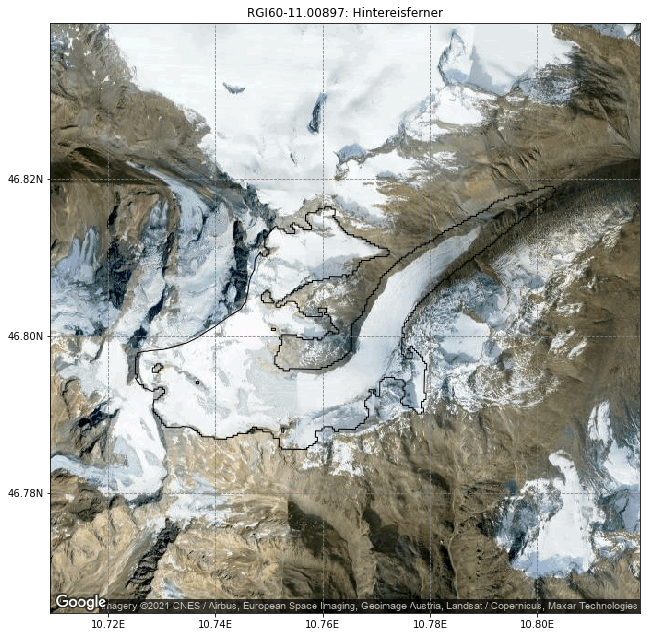

In [5]:
# google map background  "Hintereisferner"

graphics.plot_googlemap(gdir_eb[0], figsize=(9, 9))

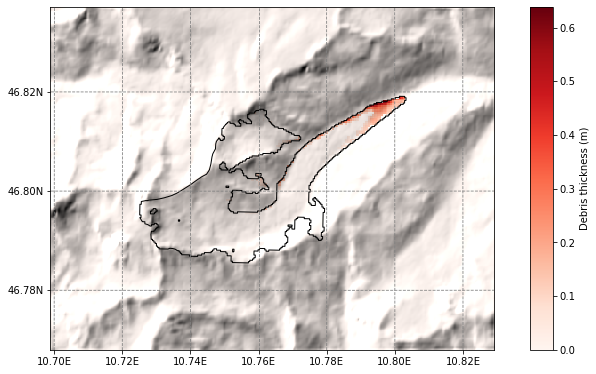

In [6]:
# plot debris thickness "Hintereisferner"
smap = ds.salem.get_map(countries=False)
smap.set_shapefile(gdir_eb[0].read_shapefile('outlines'))
smap.set_topography(ds.topo.data)

f, ax = plt.subplots(figsize=(9, 9))
smap.set_data(ds.debris_hd)
smap.set_cmap('Reds')
smap.plot(ax=ax) 
smap.append_colorbar(ax=ax, label='Debris thickness (m)')

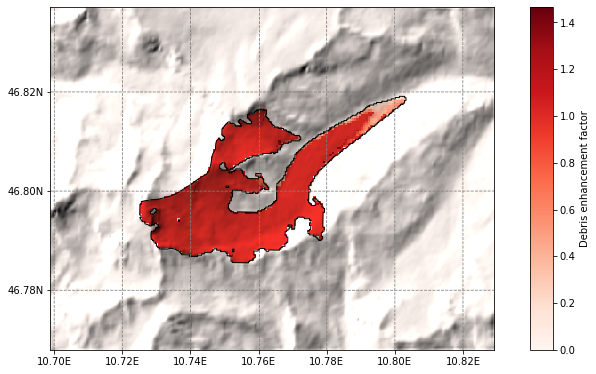

In [7]:
# plot debris enhancement factor "Hintereisferner"

f, ax = plt.subplots(figsize=(9, 9))

smap.set_data(ds.debris_ed)
smap.set_cmap('Reds')
smap.plot(ax=ax)
smap.append_colorbar(ax=ax, label='Debris enhancement factor')



In [8]:
# check glacier directory files "Hintereisferner"
print(os.listdir(gdir_eb[0].dir))


['climate_historical.nc', 'climate_info.json', 'diagnostics.json', 'glacier_grid.json', 'local_mustar.json', 'log.txt', 'model_diagnostics_historical.nc', 'model_flowlines.pkl', 'model_run_historical.nc', 'outlines.tar.gz', 'dem.tif', 'dem_source.txt', 'gridded_data.nc', 'debris_hd.tif', 'debris_ed.tif', 'elevation_band_flowline.csv', 'elevation_band_flowline_fixed_dx.csv', 'inversion_flowlines.pkl']


In [17]:
# MB 

mbmod0 = MassBalance_with_Debris.MultipleFlowlineMassBalance(gdir0, use_inversion_flowlines=True)
fls_test0 = gdir0.read_pickle('inversion_flowlines')
mbmod1 = MassBalance_with_Debris.MultipleFlowlineMassBalance(gdir1, use_inversion_flowlines=True)
fls_test1 = gdir1.read_pickle('inversion_flowlines')
mbmod2 = MassBalance_with_Debris.MultipleFlowlineMassBalance(gdir2, use_inversion_flowlines=True)
fls_test2 = gdir2.read_pickle('inversion_flowlines')


################################################################# Method 1 (without debris)

heights0, widths, mb0 = mbmod0.get_annual_mb_on_flowlines(fls_test0, year=2018)
mb_0 = mb0 * cfg.SEC_IN_YEAR * cfg.PARAMS['ice_density'] /1e3


heights1, widths, mb1 = mbmod1.get_annual_mb_on_flowlines(fls_test1, year=2018)
mb_1 = mb1 * cfg.SEC_IN_YEAR * cfg.PARAMS['ice_density'] /1e3

heights2, widths, mb2 = mbmod2.get_annual_mb_on_flowlines(fls_test2, year=2018)
mb_2 = mb2 * cfg.SEC_IN_YEAR * cfg.PARAMS['ice_density'] /1e3



###################################################################### Method 2 (With debris)
heights00, widths, mb0 = mbmod0.get_annual_mb_on_flowlines_debris(fls_test0, year=2018)
mb_00 = mb0 * cfg.SEC_IN_YEAR * cfg.PARAMS['ice_density'] /1e3

heights11, widths, mb1 = mbmod1.get_annual_mb_on_flowlines_debris(fls_test1, year=2018)
mb_11 = mb1 * cfg.SEC_IN_YEAR * cfg.PARAMS['ice_density'] /1e3


heights22, widths, mb2 = mbmod2.get_annual_mb_on_flowlines_debris(fls_test2, year=2018)
mb_22 = mb2 * cfg.SEC_IN_YEAR * cfg.PARAMS['ice_density'] /1e3


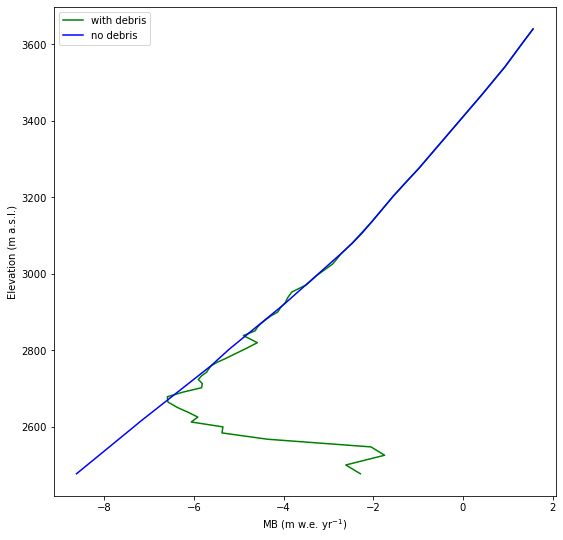

In [10]:
# plot  mass balance as a function of elevation "Hintereisferner"
f, ax = plt.subplots(1, figsize=(9, 9)) 
plt.plot(mb_00, heights00, label='with debris', color= 'green')
plt.plot(mb_0, heights0, label='no debris', color= 'blue')
plt.ylabel('Elevation (m a.s.l.)'); plt.xlabel('MB (m w.e. yr$^{-1}$)'); plt.legend()

In [11]:
# MSB_specific_mb without debris "Hintereisferner"
mbmod = MassBalance_with_Debris.PastMassBalance(gdir0, use_inversion_flowlines=True)
fls = gdir0.read_pickle('inversion_flowlines')
years = np.arange(2000, 2018)
mb_ts = mbmod.get_specific_mb(fls=fls, year=years)

# MSB_specific_mb with debris
mbmod = MassBalance_with_Debris.PastMassBalance(gdir0, use_inversion_flowlines=True)
mb_ts0 = mbmod.get_specific_mb_debris(fls=fls, year=years)


Text(0.5, 0, 'Year')

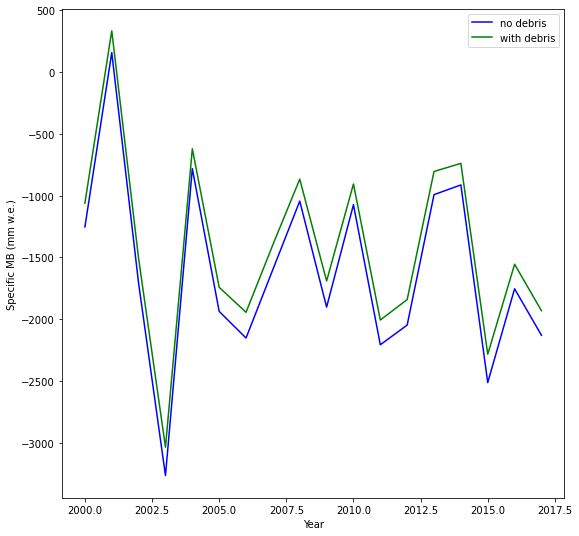

In [12]:
# plot specific MB  "Hintereisferner"
f, ax = plt.subplots(1, figsize=(9, 9)) 
plt.plot(years, mb_ts, label='no debris', color= 'blue')
plt.plot(years, mb_ts0, label='with debris', color= 'green')
plt.ylabel('Specific MB (mm w.e.)'); plt.legend()
plt.xlabel('Year')


In [13]:
# Get the reference mass-balance from the WGMS "Hintereisferner"
ref_df = gdir0.get_ref_mb_data()

# Compute the specific MB for this glacier with and without debris (during reference mass-balance)

ref_df['OGGM (calib)'] = mbmod.get_specific_mb(fls=fls, year=ref_df.index.values)
ref_df['OGGM (debri)'] = mbmod.get_specific_mb_debris(fls=fls, year=ref_df.index.values)

Text(0.5, 0, 'Year')

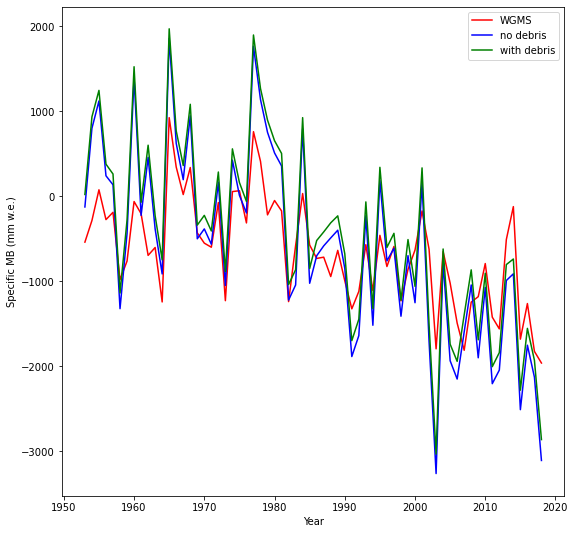

In [14]:
# plot specific MB with reference mass-balance "Hintereisferner"

f, ax = plt.subplots(1, figsize=(9, 9)) 
plt.plot(ref_df.index, ref_df.ANNUAL_BALANCE, label='WGMS', color= 'red')
plt.plot(ref_df.index, ref_df['OGGM (calib)'], label='no debris', color= 'blue')
plt.plot(ref_df.index, ref_df['OGGM (debri)'], label='with debris', color= 'green')
#ax.set_xlim(2000, 2018)
plt.ylabel('Specific MB (mm w.e.)'); plt.legend()
plt.xlabel('Year')

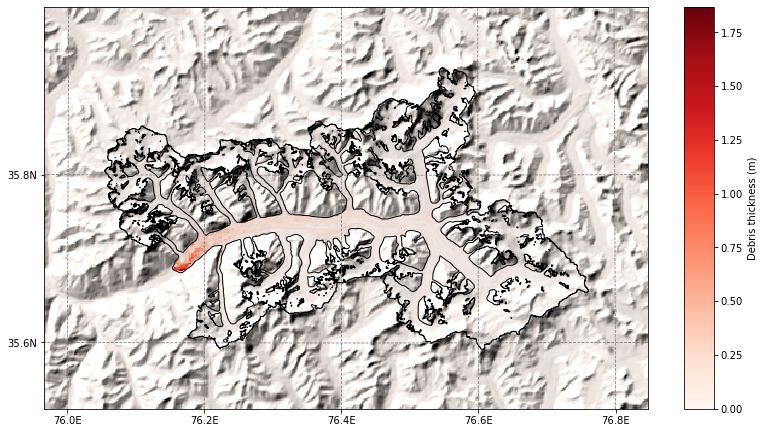

In [15]:
# Another example "Baltoro Glacier" 
# plot debris thickness

with xr.open_dataset(gdir1.get_filepath('gridded_data')) as ds1:
    ds1 = ds1.load()
    
f, ax = plt.subplots(1, figsize=(12, 12)) 
smap = ds1.salem.get_map(countries=False)
smap.set_shapefile(gdir1.read_shapefile('outlines'))
smap.set_topography(ds1.topo.data)
smap.set_data(ds1.debris_hd)
smap.set_cmap('Reds')
smap.plot(ax=ax) 
smap.append_colorbar(ax=ax, label='Debris thickness (m)')



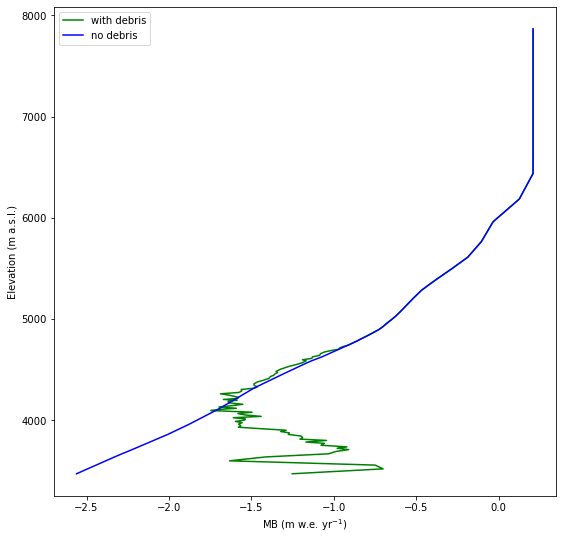

In [16]:
# plot  mass balance as a function of elevation "Baltoro Glacier" 
f, ax = plt.subplots(1, figsize=(9, 9)) 
plt.plot(mb_11, heights11, label='with debris', color= 'green')
plt.plot(mb_1, heights1, label='no debris', color= 'blue')
plt.ylabel('Elevation (m a.s.l.)'); plt.xlabel('MB (m w.e. yr$^{-1}$)'); plt.legend()